In [1]:
import sys
from pathlib import Path

# point this to the directory that contains the ReferenceTreeTools folder
PROJECT_ROOT = Path("C:\\Users\\User\\Desktop\\Julian\\Uni\\WS 25\\AIR\\herBERT").resolve()

sys.path.append(str(PROJECT_ROOT))

from ReferenceTreeTools.ReferenceTreeBuilder import ReferenceTreeBuilder



Random root: 2020.acl-main.593
Visited nodes: 97
Edges in small subgraph: 176
Stored tree: c:\Users\User\Desktop\Julian\Uni\WS 25\AIR\herBERT\output\rtb_tree_2020.acl-main.593.json

Legend (color = depth):
      (blue) reverse crawl depth       (white) root       (red) crawl depth

Nodes:
  2022.nlp4convai-1.10: {}
  2022.acl-long.26: {}
  D15-1044: {}
  S15-1002: {}
  P16-1139: {}
  2022.naacl-main.84: {}
  N16-1170: {}
  2022.acl-short.36: {}
  D15-1075: {}
  2022.acl-long.80: {}
  2022.findings-acl.273: {}
  2021.emnlp-main.556: {}
  P17-1152: {}
  2022.acl-long.421: {}
  2022.findings-acl.189: {}
  2022.acl-long.197: {}
  2021.emnlp-main.45: {}
  2022.acl-long.1: {}
  D19-1110: {}
  P16-2022: {}
  2022.findings-naacl.196: {}
  2022.acl-short.34: {}
  2022.naacl-tutorials.3: {}
  P16-1162: {}
  2021.acl-short.57: {}
  2021.emnlp-main.425: {}
  2022.findings-acl.222: {}
  P15-1150: {}
  2022.findings-acl.275: {}
  2022.findings-naacl.10: {}
  2022.naacl-main.274: {}
  2022.bionlp-1.4

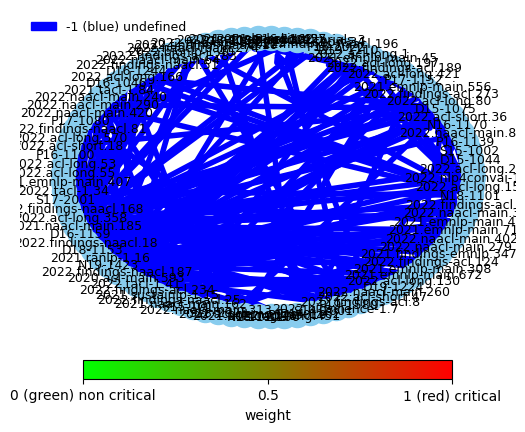

In [2]:
import random
from collections import deque
import os
import sys
import ACLData
from pathlib import Path

MAX_DEPTH = 10
REVERSE_DEPTH = 10

# Pick a random root node that has outgoing citations
edges = ACLData.load_edges_csv("experimental_data/edges.csv")
root = random.choice(ACLData.load_candidate_nodes("experimental_data/acl_candidate_nodes.txt"))
print("Random root:", root)

incoming = ACLData.build_incoming(edges)
outgoing = ACLData.build_outgoing(edges)

for u, vs in outgoing.items():
    for v in vs:
        incoming.setdefault(v, []).append(u)

visited = set([root])
queue = deque([(root, 0)])


while queue:
    pid, depth = queue.popleft()
    if depth >= MAX_DEPTH:
        continue
    for neigh in outgoing.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))


queue = deque([(root, 0)])
while queue:
    pid, depth = queue.popleft()
    if depth >= REVERSE_DEPTH:
        continue
    for neigh in incoming.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))

print("Visited nodes:", len(visited))


# Filter edges 

mini_edges = [(u, v) for (u, v) in edges if u in visited and v in visited]
print("Edges in small subgraph:", len(mini_edges))

# Build reference tree

rtb = ReferenceTreeBuilder()
for pid in visited:
    rtb.addNode(pid)
for u, v in mini_edges:
    rtb.addEdge(u, v)

rtb.build()

out_dir = os.path.join(os.getcwd(), "output")
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, f"rtb_tree_{root}.json")
rtb.store(out_path)

tree = rtb.load(out_path)

print("Stored tree:", out_path)

tree.printTree()
tree.plotTree()


In [ ]:

candidate_nodes = ACLData.load_candidate_nodes("experimental_data/acl_candidate_nodes.txt")
rtb = ReferenceTreeBuilder()
rtb.create(nodes=list(candidate_nodes), edges=[(u, v) for (u, v) in edges])


WARNING! Adding edge from 2020.emnlp-main.380 to W16-3617 not possible. W16-3617 is not a node.
WARNING! Adding edge from 2020.emnlp-main.380 to D18-1374 not possible. D18-1374 is not a node.
WARNING! Adding edge from 2020.emnlp-main.380 to D14-1162 not possible. D14-1162 is not a node.
WARNING! Adding edge from P19-1161 to K17-2001 not possible. K17-2001 is not a node.
WARNING! Adding edge from P19-1161 to W17-1609 not possible. W17-1609 is not a node.
WARNING! Adding edge from P19-1161 to N18-2002 not possible. N18-2002 is not a node.
WARNING! Adding edge from P19-1161 to D17-1323 not possible. D17-1323 is not a node.
WARNING! Adding edge from P19-1161 to N18-2003 not possible. N18-2003 is not a node.
WARNING! Adding edge from 2022.semeval-1.215 to W17-4419 not possible. W17-4419 is not a node.
WARNING! Adding edge from 2022.semeval-1.215 to D17-2017 not possible. D17-2017 is not a node.
WARNING! Adding edge from 2022.semeval-1.215 to 2020.coling-main.54 not possible. 2020.coling-mai

Random root: 2022.acl-long.163

Legend (color = depth):
      (blue) reverse crawl depth       (white) root       (red) crawl depth

Nodes:
  P19-1452: depth=2
  W19-5944: depth=2
  2021.acl-long.501: depth=1
  2021.naacl-main.34: depth=1
  D19-1410: depth=2
  2021.acl-long.499: depth=1
  2020.acl-main.22: depth=2
  2020.acl-main.451: depth=2
  N19-1170: depth=2
  P17-1108: depth=2
  P19-1213: depth=3
  2021.acl-long.11: depth=1
  2020.acl-main.454: depth=2
  D19-1387: depth=3
  W19-8607: depth=2
  2020.acl-main.226: depth=1
  P19-1255: depth=1
  2020.emnlp-main.349: depth=1
  P17-2039: depth=2
  D19-1578: depth=3
  2020.acl-main.703: depth=1
  2020.emnlp-main.419: depth=2
  D19-1253: depth=3
  N18-1065: depth=2
  D19-1290: depth=2
  N19-1423: depth=1
  W19-2308: depth=2
  2020.acl-main.183: depth=2
  D19-1321: depth=2
  N19-1142: depth=2
  P18-1249: depth=3
  D19-1052: depth=1
  P19-1195: depth=2
  W18-2501: depth=2
  2020.emnlp-main.736: depth=2
  P19-1080: depth=2
  W18-5020: depth=

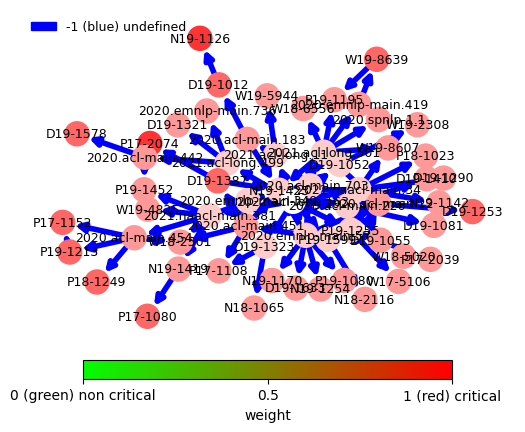

In [21]:
import random

MAX_DEPTH = 5
REVERSE_DEPTH = 2

root = random.choice(candidate_nodes)
print("Random root:", root)

crawl_tree = rtb.buildCrawlTree(root, MAX_DEPTH, REVERSE_DEPTH)

crawl_tree.printTree()
crawl_tree.plotTree()
